# Plausible Daten

## python konfigurieren

### Module importieren

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import holidays
import seaborn as sns
import plotly
import plotly.graph_objects as go
import sys
import os
import locale
from distutils.spawn import find_executable


print('Versionen der verwendeten python-Module: ')
print('numpy', np.__version__)
print('matplotlib', matplotlib.__version__)
print('pandas', pd.__version__)
print('datetime', dt)
print('holidays', holidays.__version__)
print('seaborn', sns.__version__)
print('plotly', plotly.__version__)
print('sys', sys.version)
print('os', os)
print('locale', locale)

Versionen der verwendeten python-Module: 
numpy 1.20.3
matplotlib 3.4.2
pandas 1.3.2
datetime <module 'datetime' from '/home/franzi/.pyenv/versions/miniconda3-latest/envs/21sye/lib/python3.9/datetime.py'>
holidays 0.11.2
seaborn 0.11.2
plotly 5.1.0
sys 3.9.6 (default, Aug 18 2021, 19:38:01) 
[GCC 7.5.0]
os <module 'os' from '/home/franzi/.pyenv/versions/miniconda3-latest/envs/21sye/lib/python3.9/os.py'>
locale <module 'locale' from '/home/franzi/.pyenv/versions/miniconda3-latest/envs/21sye/lib/python3.9/locale.py'>


### Grafikparameter einstellen

In [3]:
plt.rcParams['savefig.dpi'] = 75
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 18
locale.setlocale(locale.LC_ALL, '')
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

if find_executable('latex'):
    plt.rcParams['text.usetex'] = True
    pd.set_option('display.latex.repr', True)
    pd.set_option('display.latex.longtable', True)

### Funktionen definieren

## Lernziele

<div class="admonition note" style="background: #e5f1ff; padding: 10px">
<div class="title"><b>LERNZIELE</b></div>
    <ul>
        <li> Daten kritisch beurteilen </li>
        <li> mit Kennwertbildung und Vergleichen </li>
        <li> um qualitativ hochwertige Daten einzusetzen bei der Energiedatenanalyse </li>
    </ul>
</div>

## Plausible Daten - wie beurteilen?

### Anforderungen benötigen plausible Werte

<div class="admonition important" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>AUFGABE</b></div>
Wie kommen Sie zu plausiblen Werten in Ihren Anforderungen? Wie können Sie wissen, ob ein Wert typisch oder realistisch ist? Sammeln Sie mind. 5 Wege dazu.
</div>

*Antwort:...*

### Beispiel Energiebedarf einer Bäckerei

Auf Nachfrage gibt ein Bäckereibetrieb folgende Verbrauchsdaten an:

In [1]:
EBackJahr = 2000 # jährlicher Stromverbrauch in kWh/a
Mehl = 5000 # jährlicher Mehlverbrauch in kg/a

Kann das sein?

In [4]:
Backtage = 300
EBackTag = EBackJahr/Backtage
print('Durchschnittlicher Stromverbrauch pro Backtag: ' +str(np.round(EBackTag,1)) +' kWh/d')

Durchschnittlicher Stromverbrauch pro Backtag: 6.7 kWh/d


In [5]:
MehlTag = Mehl/Backtage
print('Durchschnittlicher Mehlverbrauch pro Backtag: ' +str(np.round(MehlTag,1))+ ' kg/d')

Durchschnittlicher Mehlverbrauch pro Backtag: 16.7 kg/d


In [6]:
MehlProBrot = np.linspace(0.5,1,2) # ca. 500 - 1000 g Mehl pro Brot, hier in kg
BroteProTag = MehlTag/MehlProBrot
print(str(np.round(BroteProTag[1],1)) + '-' +str(np.round(BroteProTag[0],1)) + ' Brote/Tag')

16.7-33.3 Brote/Tag


Wie viel Leistung hat wohl der Backofen?

In [7]:
PBackZuhause = 3 # Backofen zuhause ca. 3 kW
tBack = 1 # 1 Stunde Backzeit für ein großes Brot
ZahlBroteAusEnergie = EBackTag/(PBackZuhause*tBack)
print('mit der angenommenen Energie werden ' +str(np.round(ZahlBroteAusEnergie,1))+ ' Brote pro Tag gebacken')

mit der angenommenen Energie werden 2.2 Brote pro Tag gebacken


Unplausibel:
- Energie- und Mehlverbrauch passen nicht zusammen
- Anzahl Brote erscheint auch eher niedrig

<div class="admonition note" style="background: #e5f1ff; padding: 10px">
<div class="title"><b>Plausibilisierung auch möglich mit Referenzdaten:</b></div>
z. B. <a href="https://unternehmen.energieagentur.nrw/KurzEnergieCheck/">KurzEnergieCheck der Energieagentur NRW</a>
</div>

z.B. [StromCheck der LEA Hessen](https://ratgeber.co2online.de/stromcheckbmu/lea_hessen/start)

<div class="admonition warning" style="background: #fff9e5; padding: 10px">
<div class="title"><b>Vorsicht!</b></div>
Auch Referenzdaten können unplausibel sein (perfekt gibt es nicht).
</div>

### Beispiel Messdaten einer Waschmaschine

In [8]:
EWaschgang = 1.163 # Energieverbrauch laut Logger in kWh

Text(0, 0.5, 'Wirkleistung [W]')

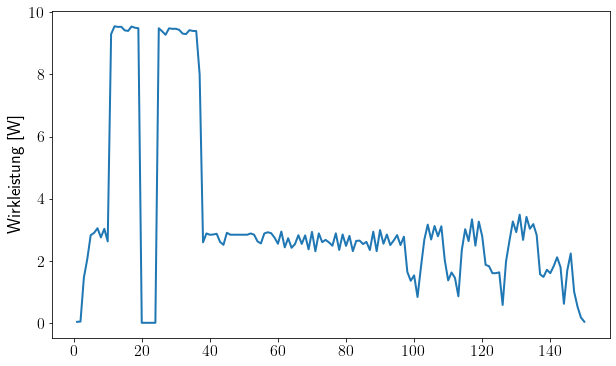

In [9]:
PWaschgang = pd.read_csv('../data/wama.csv',header=1)
PWaschgang = PWaschgang.set_index('%Aufnahmezeit [min.]')
ax = PWaschgang['Stromstärke [A]'].plot()
ax.set_ylabel('Wirkleistung [W]')

<div class="admonition important" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>AUFGABE</b></div>
Sehen Sie sich die Daten an. Kann das sein? Sie können drei Fehler im Datensatz finden.</div>

*Antwort:...*

## Techniken zur Plausibilisierung von Daten

- Mit **Referenzwerten** aus der Fachliteratur vergleichen - wobei Vorsicht geboten ist, denn nicht alle Referenzsysteme sind wirklich vergleichbar und auch nicht alle Referenzwerte sind plausibel.

- **Nullmessungen** sind häufig fehlerhafte Messungen (fehlende Messpunkte) und müssen bereinigt werden.

- **Viele konstant bleibende Messwerte** (bei denen nicht mal die letzte Nachkommastelle schwankt) deuten darauf hin, dass das Messgerät fehlerhafterweise immer wieder den ersten Wert gespeichert hat, obwohl bereits ein anderer Messwert anlag.

- **Energiesummen bilden** - bei einem Leistungsprofil muss die Energiesumme dem gesamten Energieverbrauch entsprechen - mit einer gewissen Toleranz für die aufsummierten Messungenauigkeiten.

- **Rangfolge der Vertrauenswürdigkeit** von Fachliteratur beachten.

- **Selber nachmessen** (wenn das immer so einfach wäre).

- **Verschiedene Quellen** nutzen - wenn sich z. B. in mehreren Fachbüchern, die einander nicht zitieren, unabhängig voneinander also, derselbe Wert findet, dann ist der vertrauenswürdiger.

- **Statistische Datenerhebungen** nutzen, um zu beurteilen, ob ein Wert noch "im Rahmen" ist oder ob er sehr untypisch ist.

## Varianz von Daten

### Reproduzierbarkeit und Schwankungen bei mehrfachen Messungen

Beispiele: 
- Wie stark variiert die jährliche Solarstrahlung in DE?
- Wie stark variiert der jährliche Stromverbrauch einer vierköpfigen Familie?
- Was, wenn noch ein Kind geboren wird?
- Was, wenn eins auszieht? (Oder wegen Corona wieder zuhause einzieht?)
- Wie stark variiert der Energiebedarf einer Waschmaschine bei unterschiedlichen Beladungen (im gleichen Programm)?
- Was, wenn das Wasser besonders kalt aus der Leitung kommt?

<div class="admonition important" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>AUFGABE</b></div>
Einige Einflussgrößen auf Energienutzung lassen sich nicht konstant halten, jedenfalls nicht über mehrere Jahre. Diese Einflussgrößen stellen sozusagen Störgrößen für die energetische Optimierung dar: Was heißt das für Ihre Optimierungsbemühungen?
</div>

*Antwort:...*

### Umgang mit variierenden Randbedingungen

Fiktive Daten einer Energieberatung: welche energetische Optimierung lohnt?

![Fiktive Daten einer Energieberatung](../img/fiktiveoptimierung.png)

<div class="admonition important" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>AUFGABE</b></div>
Sammeln Sie in Ihrem Projekt Einflussgrößen, die variabel sein könnten. Überlegen Sie auch, wie Sie diese berücksichtigen können.
</div>

*Antwort:...*

## Literatur

```{bibliography}
:filter: docname in docnames
```